> 主成分分析（Principal Component Analysis，PCA）， 是一种统计方法。通过正交变换将一组可能存在相关性的变量转换为一组线性不相关的变量，转换后的这组变量叫主成分。

# 数据降维

PCA的思想是将n维特征映射到k维上（k<n），这k维是全新的正交特征。
这k维特征称为主成分，是重新构造出来的k维特征，而不是简单地从n维特征中去除其余n-k维特征。

# 降维标准

- 样本点到这个超平面的距离足够近
- 样本点在这个超平面上的投影能尽可能的分开

# PCA推导

- 基于最大投影方差
- 基于最小投影距离

> 先假定只有二维，即只有两个变量，它们由横坐标和纵坐标所代表，因此每个观测值都有相应于这两个坐标轴的两个坐标值，
> 如果这些数据形成一个椭圆形状的点阵，那么这个椭圆有一个长轴和一个短轴。
> 在短轴方向上，数据变化很少；在极端的情况，短轴如果退化成一点，那只有在长轴的方向才能够解释这些点的变化了。
> 这样，由二维到一维的降维就自然完成了。

# PCA算法总结

## 优点

- 仅仅需要以方差衡量信息量，不受信息集以外的因素影响
- 各主成分之间正交，可消除原始数据成分间互相影响的因素
- 计算方法简单，主要运算时特征值分解，易于实现

## 缺点

- 主成分各个特征维度的含义具有一定的模糊性，不如原始样本特征的解释性强
- 方差小的非主成分也可能含有对样本差异重要信息，因降维丢弃可能对后续数据处理有影响

# 用scikit-learn实现主成分分析

## quick-start

In [72]:
import numpy as np
from sklearn.decomposition import PCA
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
pca.fit(X)

print(pca.explained_variance_ratio_)
print(pca.explained_variance_)

[ 0.99244289  0.00755711]
[ 7.93954312  0.06045688]


## 指定奇异值分解SVD的方法

In [73]:
pca = PCA(n_components=2, svd_solver="full")
pca.fit(X)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[ 0.99244289  0.00755711]
[ 6.30061232  0.54980396]


## scikit-learn官网demo

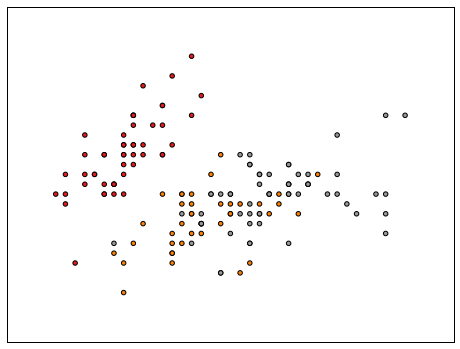

In [75]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, :2]
y =  iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

plt.show()

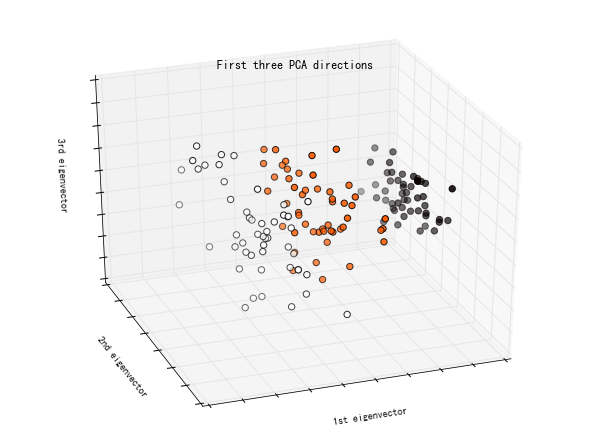

In [42]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], cmap=plt.cm.hot, c=y,
          edgecolor="k", s=40)
ax.set_title("First three PCA directions")

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

## PCA实例

### 生成随机数据并可视化

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:806: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


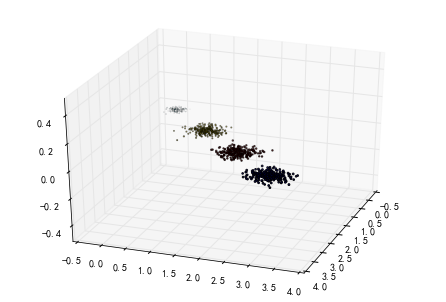

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from sklearn.datasets.samples_generator import make_blobs

fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)
ax.set_zlim(-0.5, 0.5)

X, y = make_blobs(n_samples=1000, n_features=3, centers=[[3, 3, 3], [0, 0, 0], [1, 1, 1], [2, 2, 2]],
                 cluster_std=[0.2, 0.1, 0.2, 0.2])

ax.plot_surface(X[:, 0], X[:, 1], X[:, 2], rstride=1, cstride=1, cmap=('rainbow'))
plt.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, marker='o')
plt.show()

### 对数据投影，看看投影后的三个维度的方差分布

In [59]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)

[ 0.9831814   0.00883556  0.00798304]
[ 3.76919301  0.03387263  0.03060433]


### 从三维降到二维

In [60]:
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)

[ 0.9831814   0.00883556]
[ 3.76919301  0.03387263]


### 看看转换后的数据分布

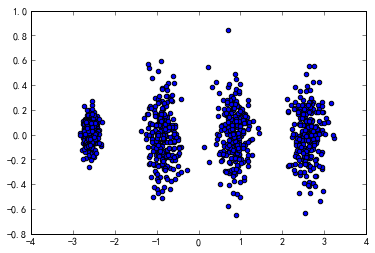

In [64]:
X_new = pca.transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1], marker="o")
plt.show()

### 指定降维后的主成分方差和比例

In [65]:
pca = PCA(n_components=0.95)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)
print(pca.n_components_)

[ 0.9831814]
[ 3.76919301]
1


### 阈值为99%的情况

In [66]:
pca = PCA(n_components=0.99)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)
print(pca.n_components_)

[ 0.9831814   0.00883556]
[ 3.76919301  0.03387263]
2
